In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import json
import plotly.plotly as py
import plotly.graph_objs as graph_objs

%matplotlib inline

In [129]:
df = pd.read_csv('Population_Colorado.csv')

with open('colorado_counties.geojson') as f:
    counties = json.load(f)

# Denver Population

In [130]:
denver_pop = df[df['county'] == 'Denver'].copy()

In [131]:
denver_pop_yr = denver_pop.groupby('year').sum()

denver_pop_yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1990 to 2040
Data columns (total 5 columns):
fipsCode            51 non-null int64
age                 51 non-null int64
malePopulation      51 non-null int64
femalePopulation    51 non-null int64
totalPopulation     51 non-null int64
dtypes: int64(5)
memory usage: 2.4 KB


In [132]:
print 'hello'

hello


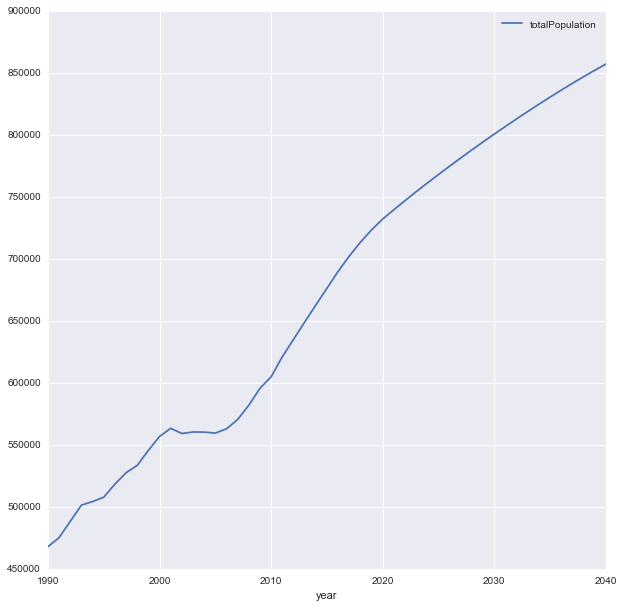

In [133]:
denver_pop_yr.plot(y = 'totalPopulation', figsize = (10,10))

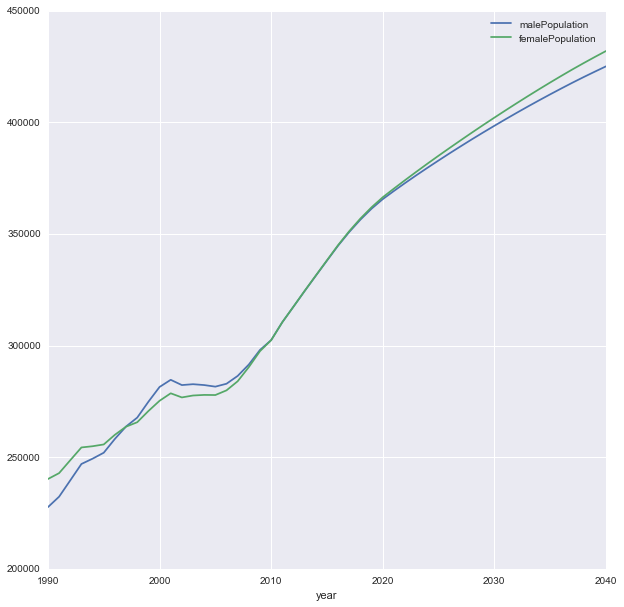

In [134]:
denver_pop_yr.plot(y = ['malePopulation', 'femalePopulation'], figsize = (10,10))

In [135]:
bins = [0, 21, 34,44,54,64,90]
print bins


denver_pop['age_groups'] = pd.cut(denver_pop['age'], bins, right=False)

[0, 21, 34, 44, 54, 64, 90]


In [136]:
denver_pop.head()

,county,fipsCode,year,age,malePopulation,femalePopulation,totalPopulation,age_groups
925,Denver,31,1993,68,1638,2119,3757,"[64, 90)"
971,Denver,31,1996,36,4851,4163,9014,"[34, 44)"
979,Denver,31,2010,5,4116,4020,8136,"[0, 21)"
1028,Denver,31,1993,33,5009,4627,9636,"[21, 34)"
1063,Denver,31,1990,88,194,588,782,"[64, 90)"


In [137]:
denver_pop_cats = denver_pop.groupby(['year', 'age_groups']).sum()
#denver_pop_cats
#denver_pop_cats.pivot(index = 'year', columns='cats', values='totalPopulation')

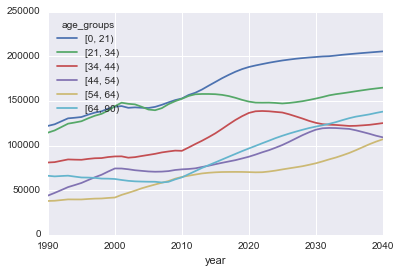

In [138]:
denver_pop_cats.unstack('age_groups')['totalPopulation'].plot()

# State Wide Population

In [158]:
d = {}
for x in range(len(counties['features'])):
    name = counties['features'][x]['properties']['name'][:-11]
    if name in df['county'].unique():
        d[name] = counties['features'][x]
    else:
        print 'not in: ', name

ser = pd.Series(d.values(), index = d.keys())
ser.name = 'coordinates'

full_df = df.groupby(['county', 'year'], as_index=False).sum()
full_df.drop(['fipsCode', 'age'], inplace = True, axis=1)

full_df = full_df.join(ser, on='county')

full_df[df['totalPopulation']]

array(['Adams', 'Alamosa', 'Arapahoe', 'Archuleta', 'Baca', 'Bent',
       'Boulder', 'Broomfield', 'Chaffee', 'Cheyenne', 'Clear Creek',
       'Conejos', 'Costilla', 'Crowley', 'Custer', 'Delta', 'Denver',
       'Dolores', 'Douglas', 'Eagle', 'El Paso', 'Elbert', 'Fremont',
       'Garfield', 'Gilpin', 'Grand', 'Gunnison', 'Hinsdale', 'Huerfano',
       'Jackson', 'Jefferson', 'Kiowa', 'Kit Carson', 'La Plata', 'Lake',
       'Larimer', 'Las Animas', 'Lincoln', 'Logan', 'Mesa', 'Mineral',
       'Moffat', 'Montezuma', 'Montrose', 'Morgan', 'Otero', 'Ouray',
       'Park', 'Phillips', 'Pitkin', 'Prowers', 'Pueblo', 'Rio Blanco',
       'Rio Grande', 'Routt', 'Saguache', 'San Juan', 'San Miguel',
       'Sedgwick', 'Summit', 'Teller', 'Washington', 'Weld', 'Yuma'], dtype=object)

In [140]:
# colors from
# https://gka.github.io/palettes/#colors=lightyellow,orange,deeppink,darkred|steps=7|bez=1|coL=1

colors = ['#ffffe0','#fffddb','#fffad7','#fff7d1','#fff5cd','#fff2c8',
          '#fff0c4','#ffedbf','#ffebba','#ffe9b7','#ffe5b2','#ffe3af',
          '#ffe0ab','#ffdda7','#ffdba4','#ffd9a0','#ffd69c','#ffd399',
          '#ffd196','#ffcd93','#ffca90','#ffc88d','#ffc58a','#ffc288',
          '#ffbf86','#ffbd83','#ffb981','#ffb67f','#ffb47d','#ffb17b',
          '#ffad79','#ffaa77','#ffa775','#ffa474','#ffa172','#ff9e70',
          '#ff9b6f','#ff986e','#ff956c','#fe916b','#fe8f6a','#fd8b69',
          '#fc8868','#fb8567','#fa8266','#f98065','#f87d64','#f77a63',
          '#f67862','#f57562','#f37261','#f37060','#f16c5f','#f0695e',
          '#ee665d','#ed645c','#ec615b','#ea5e5b','#e85b59','#e75859',
          '#e55658','#e45356','#e35056','#e14d54','#df4a53','#dd4852',
          '#db4551','#d9434f','#d8404e','#d53d4d','#d43b4b','#d2384a',
          '#cf3548','#cd3346','#cc3045','#ca2e43','#c72b42','#c52940',
          '#c2263d','#c0233c','#be213a','#bb1e37','#ba1c35','#b71933',
          '#b41731','#b2152e','#b0122c','#ac1029','#aa0e27','#a70b24',
          '#a40921','#a2071f','#a0051c','#9d0419','#990215','#970212',
          '#94010e','#91000a','#8e0006','#8b0000', '#8b0000']

scl = dict(zip(np.arange(0, 101, 1), colors))

In [166]:
def get_scl(obj):
    frac = obj / 10000
    return scl[frac]
    
full_df['color'] = full_df['totalPopulation'].apply(get_scl)

In [244]:
df_2016 = full_df[full_df['year'] == 2040]

df_2016

,county,year,malePopulation,femalePopulation,totalPopulation,coordinates,color
50,Adams,2040,383226,385095,768312,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#c72b42
101,Alamosa,2040,12157,11751,23900,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#fffad7
152,Arapahoe,2040,417629,433568,851202,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#b2152e
203,Archuleta,2040,11227,11719,22950,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#fffad7
254,Baca,2040,2129,2149,4277,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#ffffe0
305,Bent,2040,4061,2371,6425,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#ffffe0
356,Boulder,2040,197329,198837,396164,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#fe916b
407,Broomfield,2040,47373,48499,95866,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#ffe9b7
458,Chaffee,2040,14859,14136,28988,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#fffad7
509,Cheyenne,2040,1159,1173,2334,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",#ffffe0


In [168]:
layers_ls = []
for x in df_2016.index:
    item_dict = dict(sourcetype = 'geojson',
                     source = df_2016.ix[x]['coordinates'],
                     type = 'fill',
                     color = df_2016.ix[x]['color'])
    layers_ls.append(item_dict)

In [172]:
colorscl = [[i * .01, v] for i,v in enumerate(scl.values())]

In [174]:
mapbox_access_token = os.environ['MAPBOX_AT']

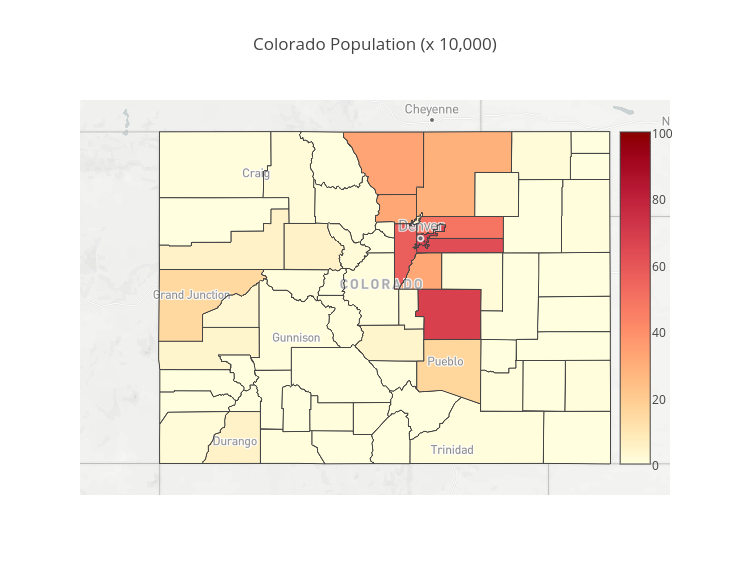

In [287]:
nums = [k/float(100) for k in scl.keys()]

data = graph_objs.Data([
            graph_objs.Scattermapbox(
                    lat = [0],
                    lon = [0],
                    marker = graph_objs.Marker(
                            size=9,
                            cmax=100,
                            cmin=0,
                            colorscale = colorscl,
                            showscale = True,
                            autocolorscale=False,
                            color=range(0,101),
                            colorbar=graph_objs.ColorBar(
                                                        yanchor='middle',
                                                        xanchor='center',
#                                                         title='population (x 10000)',
                                                        titlefont = dict(size = 15),
                                                        titleside = 'top',
                                                        y = .5,
                                                        x = .96,
                                                        len = .89
                                                        ),
                                                ),
                    mode = 'markers',
                                     )
                                    
                     ])
            
layout = graph_objs.Layout(
    title = 'Colorado Population (x 10,000)',
    height=1050,
    width=800,
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        layers= layers_ls,
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=39.03,
            lon=-105.7
        ),
        pitch=0,
        zoom=5.5,
        style='light'
    ),
)

fig = dict(data = data, layout=layout)
fn = 'test.jpeg'
save_fn = 'images/{}'.format(fn)
h = 575
w = 750
py.image.save_as(fig, filename=save_fn, width = w, height= h)
py.image.ishow(fig, width = w, height= h)

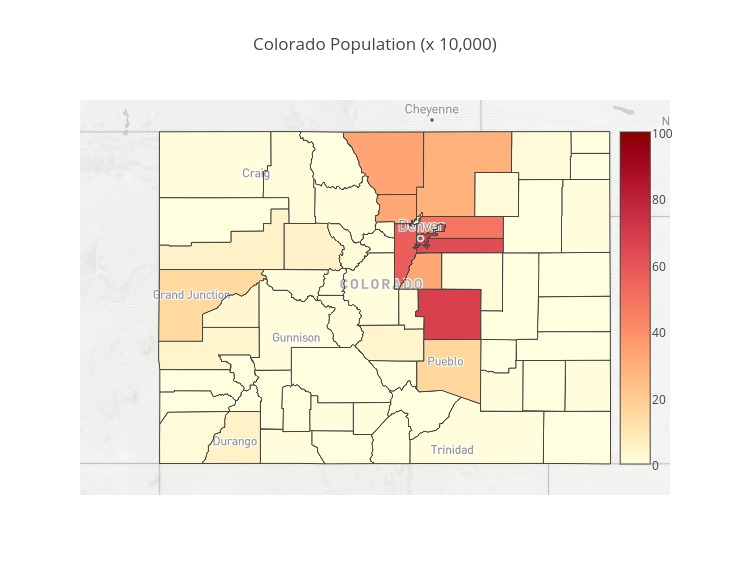

In [288]:
from IPython.display import Image

Image('images/test.jpeg')